In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('./merged_data.csv')
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
177704,250588,AAA Batteries (4-pack),1,2.99,09/22/19 13:32,"287 Jackson St, New York City, NY 10001"
81398,226858,USB-C Charging Cable,1,11.95,07/02/19 17:56,"55 Willow St, Atlanta, GA 30301"
46793,311342,Bose SoundSport Headphones,1,99.99,12/17/19 21:30,"953 North St, Seattle, WA 98101"
110782,167273,USB-C Charging Cable,1,11.95,03/06/19 19:29,"715 Walnut St, Los Angeles, CA 90001"
124818,198200,34in Ultrawide Monitor,1,379.99,05/11/19 19:19,"953 14th St, Atlanta, GA 30301"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

<AxesSubplot:>

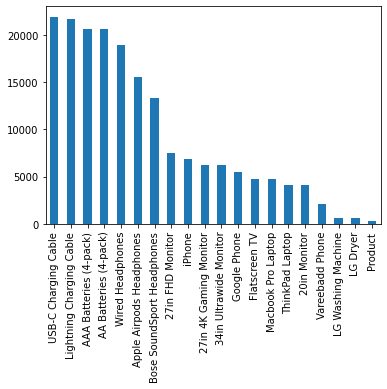

In [6]:
df['Product'].value_counts().plot(kind='bar')

# Fix data types

In [16]:
df=df.dropna(axis=0)


In [19]:
def getMonth(date:str)->str:
    return int(date.split('/')[0])-1 #get zero based 

def isDate(date:str)->bool:
    try:
        getMonth(date)
        return True
    except ValueError:
        return False
    
df=df[df['Order Date'].apply(lambda x: isDate(x))]
df['month']=df['Order Date'].apply(lambda x: getMonth(x))

In [20]:

df['Price Each']= df['Price Each'].astype('float64')
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')

In [21]:


def getCity(place: str)->str:
    return place.split(',')[1]

df['city']=df['Purchase Address'].apply(getCity)


# Plotting utility functions

In [ ]:
def countPlot(x,data ,figsize=(10,10)):
    plt.figure(figsize=figsize)
    sns.countplot(x=x,data=data)
    plt.xticks(rotation=90)
    plt.show()

def barPlot(x,y,data,figsize=(10,10),hue=None):
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=data,hue=hue)
    plt.xticks(rotation=90)
    plt.show()

### total orders of each products

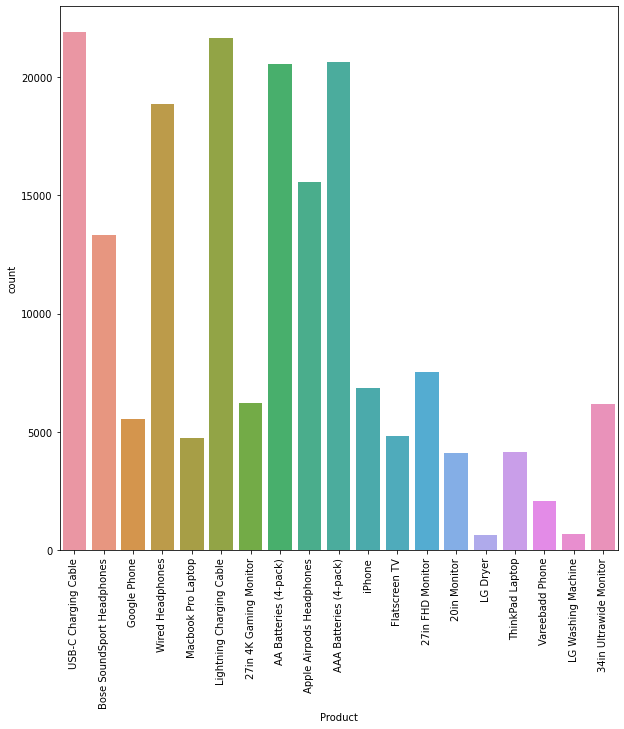

In [23]:
countPlot('Product',df)

## Relate product orders and month

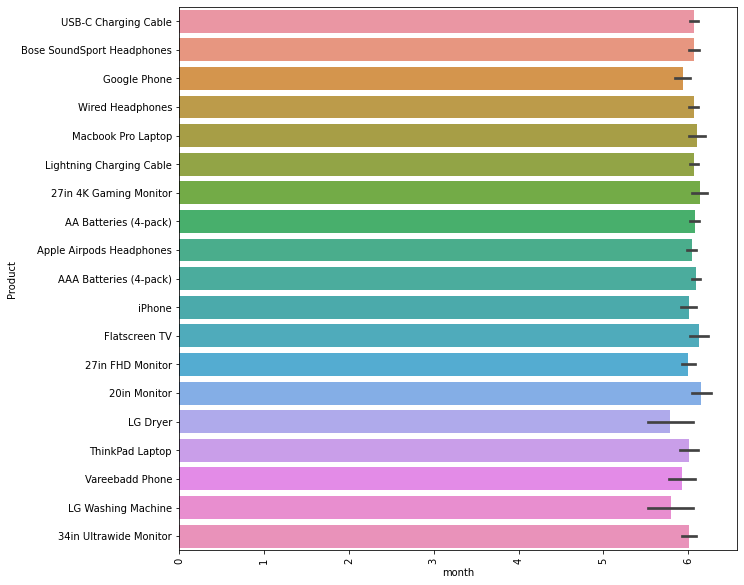

In [26]:
barPlot('month','Product',df)